In [16]:
import numpy as np
import matplotlib.pyplot as plt

from whittle_estimator import ThomasWhittleEstimator
from spatial_pp import SPP_HomPoisson, SPP_Thomas
from minimum_contrast import MinimumContrastThomas
from palm_likelihood import PalmLikelihoodThomas

# Thomas process

## Minimum contrast estimation
### Stability of estimates

Here we run $N_{mc}$ iterations of the minimum contrast esimator, each time sampling from a Thomas process with fixed parameter values from iteration to iteration. We use a grid of 100 uniformly spaced points between 0 and 0.125 for the integration over $r$. Parameters are either sampled using a random grid search between provided bounds, or using a uniform grid between the same bounds.

In [17]:
rho = 50 # parent Poisson intensity
K = 10 # number of Offpsring Poisson rate
sigma = 0.03 # sd of offspring spatial distribution
cov = np.array([[1, 0], [0, 1]]) 

# Instatiate class for Thomas process
tom = SPP_Thomas()

N_mc = 250 # Number of repetitions

# Run N_mc iterations of minimum contrast and plot diagnostics
params = np.zeros((N_mc, 3))
for j in range(N_mc):
    if ((j / 50) == (j // 50)):
        print(f"Iteration: {j}")
    spp = tom.simSPP(rho, K, sigma, cov, enlarge=1.25)
    mct = MinimumContrastThomas(spp)
    samp_params = mct.minimumContrastEstimate(
        rho_min=30, rho_max=75, sig_min=0.01, sig_max=0.1,
        random=True, verbose=False, coarseness=100)
    params[j,:] = samp_params

Iteration: 0


TypeError: MinimumContrastThomas.__init__() missing 5 required positional arguments: 'kappa', 'alpha', 'sigma', 'cov', and 'enlarge'

In [ ]:
print(f"""
        rho mean scaled bias: {np.mean((params[:,0]- rho)/rho)}
        K mean scaled bias: {np.mean((params[:,1]- K)/K)}
        sigma mean scaled bias: {np.mean((params[:,2]- sigma)/sigma)}
       """)


        rho mean scaled bias: 0.25880461356467976
        K mean scaled bias: -0.15367240079815916
        sigma mean scaled bias: -0.07028496289823846
       


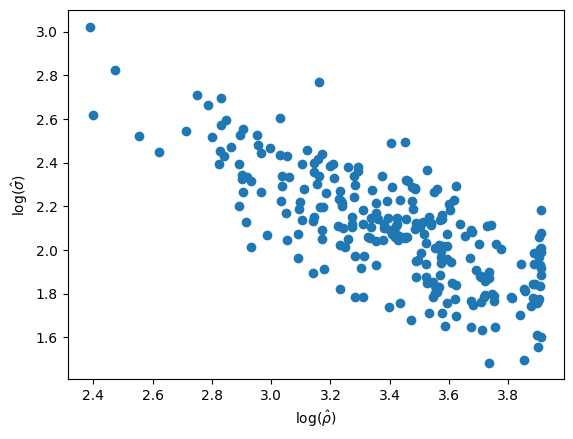

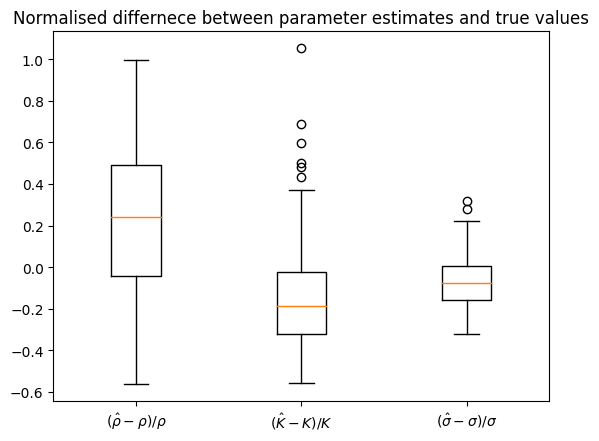

In [ ]:
plt.figure(1);
plt.scatter(np.log(params[:,0]), np.log(params[:,1]));
plt.xlabel(r"$\log(\hat{\rho})$"); plt.ylabel(r"$\log(\hat{\sigma})$");

data = [(params[:,0]- rho)/rho, (params[:,1]- K)/K, (params[:,2]- sigma)/sigma]
fig7, ax7 = plt.subplots()
ax7.set_title('Normalised differnece between parameter estimates and true values')
ax7.boxplot(data)
plt.xticks([1, 2, 3], [r'$(\hat{\rho} - \rho)/\rho$',
                    r'$(\hat{K} - K)/K$', 
                    r'$(\hat{\sigma} - \sigma)/\sigma$'])
plt.show()

## Palm likelihood estimation
### Stability of estimates

Here we run $N_{pl}$ iterations of the Palm likelihood esimator, each time sampling from a Thomas process with fixed parameter values from iteration to iteration. Parameters are either sampled using a random grid search between provided bounds, or using a uniform grid between the same bounds. A default value of $R = 1/4$ will be used, where $R$ is the assumed range of correlation of the process.

In [ ]:
rho = 50 # parent Poisson intensity
K = 25 # number of Offpsring Poisson rate
sigma = 0.03 # sd of offspring spatial distribution
cov = np.array([[1, 0], [0, 1]]) 

# Instatiate class for Thomas process
tom = SPP_Thomas()

N_pl = 250 # Number of repetitions

params = np.zeros((N_pl, 3))
for k in range(N_pl):
    if (((k+1) / 25) == ((k+1) // 25)):
        print(f"Run {k + 1} of {N_pl}")
    spp = tom.simSPP(rho, K, sigma, np.array([[1,0], [0, 1]]), 1.25)
    tpl = PalmLikelihoodThomas(spp, R=0.25)
    params[k, :] = (tpl.maximisePalmLikelihood(
                                rho_min=10, rho_max=50, 
                                K_min=5, K_max=20,
                                sig_min=0.01, sig_max=0.1,
                                coarseness=10,
                                random=True,
                                verbose=False))


Run 25 of 250
Run 50 of 250
Run 75 of 250
Run 100 of 250
Run 125 of 250
Run 150 of 250
Run 175 of 250
Run 200 of 250
Run 225 of 250
Run 250 of 250


In [ ]:
print(f"""
        rho mean scaled bias: {np.mean((params[:,0]- rho)/rho)}
        K mean scaled bias: {np.mean((params[:,1]- K)/K)}
        sigma mean scaled bias: {np.mean((params[:,2]- sigma)/sigma)}

       """)


        rho mean scaled bias: -0.09928128885280474
        K mean scaled bias: -0.2555644077681568
        sigma mean scaled bias: 0.05238523519307353

       


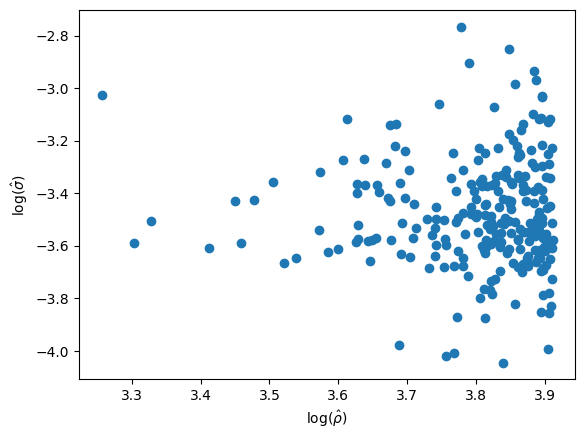

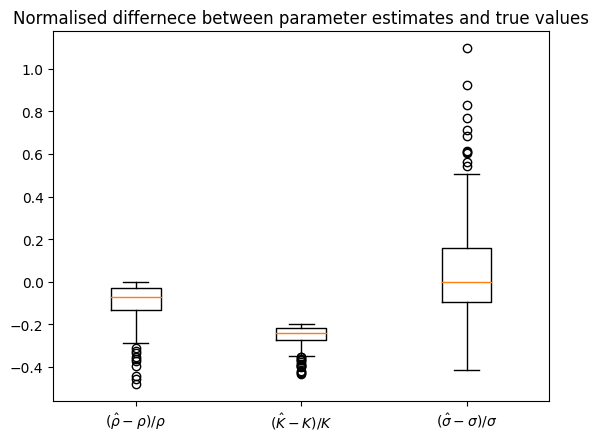

In [ ]:
plt.figure(1);
plt.scatter(np.log(params[:,0]), np.log(params[:,2]));
plt.xlabel(r"$\log(\hat{\rho})$"); plt.ylabel(r"$\log(\hat{\sigma})$");

data = [(params[:,0]- rho)/rho, (params[:,1]-K)/K, (params[:,2]- sigma)/sigma]
fig7, ax7 = plt.subplots()
ax7.set_title('Normalised differnece between parameter estimates and true values')
ax7.boxplot(data)
plt.xticks([1, 2, 3], [r'$(\hat{\rho} - \rho)/\rho$',
                      r'$(\hat{K} - K)/K$',
                      r'$(\hat{\sigma} - \sigma)/\sigma$'])
plt.show()

Sample a Thomas process

## Whittle estimation


The first run is using the untapered periodogram and estimating all three parameters within the optimiser.

In [ ]:
rho = 50 # parent Poisson intensity
K = 10 # number of Offpsring Poisson rate
sigma = 0.03 # sd of offspring spatial distribution
cov = np.array([[1, 0], [0, 1]]) 

# Instatiate class for Thomas process
tom = SPP_Thomas()

N_w = int(250) # Number of repetitions

params = np.zeros((N_w, 4))
for k in range(N_w):
    print(k)
    if (((k+1) / 25) == ((k+1) // 25)):
        print(f"Run {k + 1} of {N_w}")
    spp = tom.simSPP(rho, K, sigma, cov, enlarge=1.25)
    params[k, 3] = len(spp)
    twe = ThomasWhittleEstimator(spp, -16, 16, 1)
    neg_ll = lambda x: -twe.computeLikelihood(rho=x[0], K=x[1], sigma=x[2])
    params[k, 0:3] = (twe.scipyOptimisation(neg_ll, [15, 5, 0.03]))

In [19]:
rho = 50 # parent Poisson intensity
K = 10 # number of Offpsring Poisson rate
sigma = 0.03 # sd of offspring spatial distribution
cov = np.array([[1, 0], [0, 1]]) 

# Instatiate class for Thomas process
tom = SPP_Thomas()

N_w = int(250) # Number of repetitions

params = np.zeros((N_w, 4))
for k in range(N_w):
    print(k)
    if (((k+1) / 25) == ((k+1) // 25)):
        print(f"Run {k + 1} of {N_w}")
    spp = tom.simSPP(rho, K, sigma, cov, enlarge=1.25)
    params[k, 3] = len(spp)
    twe = ThomasWhittleEstimator(spp, -16, 16, 1)
    neg_ll = lambda x: -twe.computeLikelihood(rho=x[0], K=len(spp)/x[0], sigma=x[1])
    params[k, [0,2]] = (twe.scipyOptimisation(neg_ll, [30, 0.05]))
    params[k, 1] = len(spp)/params[k,0]

0
Defaulting to taper leading to standard periodogram.
1
Defaulting to taper leading to standard periodogram.
2
Defaulting to taper leading to standard periodogram.
3
Defaulting to taper leading to standard periodogram.
4
Defaulting to taper leading to standard periodogram.
5
Defaulting to taper leading to standard periodogram.
6
Defaulting to taper leading to standard periodogram.
7
Defaulting to taper leading to standard periodogram.
8
Defaulting to taper leading to standard periodogram.
9
Defaulting to taper leading to standard periodogram.
10
Defaulting to taper leading to standard periodogram.
11
Defaulting to taper leading to standard periodogram.
12
Defaulting to taper leading to standard periodogram.
13
Defaulting to taper leading to standard periodogram.
14
Defaulting to taper leading to standard periodogram.
15
Defaulting to taper leading to standard periodogram.
16
Defaulting to taper leading to standard periodogram.
17
Defaulting to taper leading to standard periodogram.
18

### Stability of estimates

Here we run $N_{w}$ iterations of the Whittle esimator, each time sampling from a Thomas process with fixed parameter values from iteration to iteration. Parameters are either sampled using a random grid search between provided bounds, or using a uniform grid between the same bounds.

In [18]:
def orthog_sine_taper(x):
    return (np.sin(np.pi * (x[:,0] + 1/2)) *
            np.sin(np.pi * (x[:,1] + 1/2)))

def orthog_sine_taper_ft(p, q):
    outer = -16 * p * q * np.cos(np.pi * p) * np.cos(np.pi * q)/(np.pi**2 * (4 * p ** 2 - 1) * (4 * q ** 2 - 1))
    inner = np.array([np.cos(np.pi * (p + q)), -np.sin(np.pi * (p + q))])
    return outer * inner

rho = 25 # parent Poisson intensity
K = 10 # number of Offpsring Poisson rate
sigma = 0.02 # sd of offspring spatial distribution
cov = np.array([[1, 0], [0, 1]]) 

# Instatiate class for Thomas process
tom = SPP_Thomas()

N_w = int(5) # Number of repetitions

params = np.zeros((N_w, 4))
for k in range(N_w):
    print(k)
    if (((k+1) / 25) == ((k+1) // 25)):
        print(f"Run {k + 1} of {N_w}")
    spp = tom.simSPP(rho, K, sigma, cov, enlarge=1.25)
    params[k, 3] = len(spp)
    twe = ThomasWhittleEstimator(spp, -16, 16, 1, taper=orthog_sine_taper, taper_ft=orthog_sine_taper_ft)
    neg_ll = lambda x: -twe.computeLikelihood(rho=x[0], K=x[1], sigma=x[2])
    params[k, 0:3] = (twe.scipyOptimisation(neg_ll, [15, 5, 0.03]))

0


KeyboardInterrupt: 

In [20]:
print(f"""
        rho mean scaled bias: {np.mean((params[:,0]- rho)/rho)}
        K mean scaled bias: {np.mean((params[:,1]- K)/K)}
        sigma mean scaled bias: {np.mean((params[:,2]- sigma)/sigma)}
       """)


        rho mean scaled bias: 0.14177382831974603
        K mean scaled bias: -0.08780402692482234
        sigma mean scaled bias: -0.04168130810403954
       


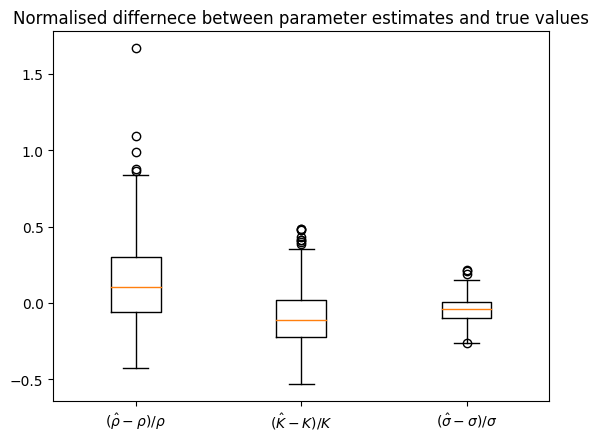

In [21]:
data = [(params[:,0]- rho)/rho, (params[:,1]-K)/K, (params[:,2]- sigma)/sigma]
fig7, ax7 = plt.subplots()
ax7.set_title('Normalised differnece between parameter estimates and true values')
ax7.boxplot(data)
plt.xticks([1, 2, 3], [r'$(\hat{\rho} - \rho)/\rho$',
                      r'$(\hat{K} - K)/K$',
                      r'$(\hat{\sigma} - \sigma)/\sigma$'])
plt.show()

In [ ]:
print(f"""Index of dispersion for rho: {np.sqrt(np.var(params[:,0]))/np.mean(params[:,0])}""")
print(f"""Index of dispersion for K: {np.sqrt(np.var(params[:,1]))/np.mean(params[:,1])}""")
print(f"""Index of dispersion for sigma: {np.sqrt(np.var(params[:,2]))/np.mean(params[:,2])}""")

Index of dispersion for rho: 0.26649808969182676
Index of dispersion for K: 0.20162827859669846
Index of dispersion for sigma: 0.19528897730157965


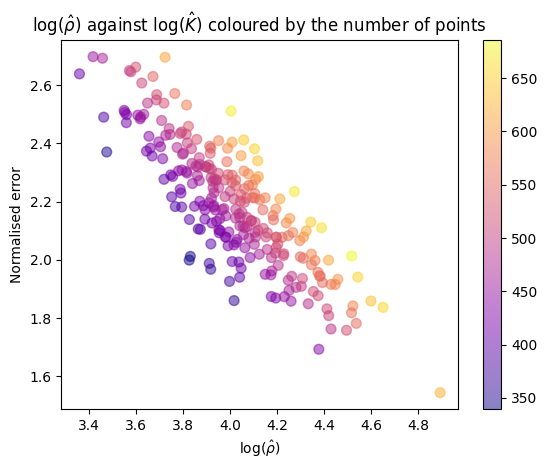

In [22]:
f, ax = plt.subplots();
points = ax.scatter(np.log(params[:,0]), np.log(params[:,1]), 
                    c=params[:,3], s=50, cmap="plasma",
                    alpha=0.5);
f.colorbar(points)
plt.xlabel(r"$\log(\hat{\rho})$"); plt.ylabel(r"$\log(\hat{K})$");
plt.ylabel("Normalised error");
plt.title(r"""$\log(\hat{\rho})$ against $\log(\hat{K})$ coloured by the number of points""");

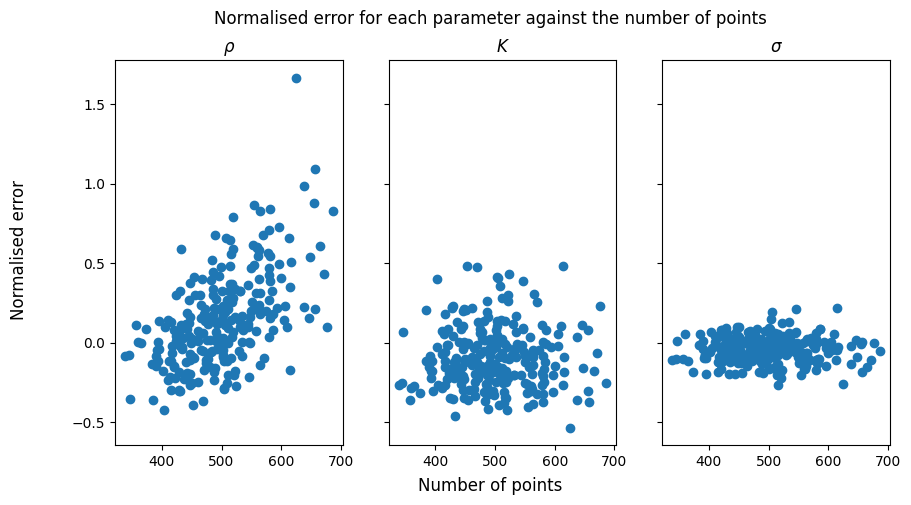

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
ax1.scatter(params[:,3], (params[:,0] - rho)/rho); ax1.set_title(r"$\rho$");
ax2.scatter(params[:,3], (params[:,1] - K)/K); ax2.set_title(r"$K$");
ax3.scatter(params[:,3], (params[:,2] - sigma)/sigma); ax3.set_title(r"$\sigma$");
fig.supxlabel("Number of points"); fig.supylabel("Normalised error");
fig.suptitle("Normalised error for each parameter against the number of points");

## KMeans estimation
### Stability of estimates

Here we run $N_{km}$ iterations of the KMeans esimator, each time sampling from a Thomas process with fixed parameter values from iteration to iteration. Parameters are either sampled using a random grid search between provided bounds, or using a uniform grid between the same bounds.

In [ ]:
rho = 25 # parent Poisson intensity
K = 10 # number of Offpsring Poisson rate
sigma = 0.03 # sd of offspring spatial distribution
cov = np.array([[1, 0], [0, 1]]) 

# Number of KMeans repetitions
N_km = 250

# Instatiate class for Thomas process
tom = SPP_Thomas()

params = np.zeros((N_km, 3))
for i in range(N_km):
    if ((i+1)/10 == (i+1)//10):
        print(f"Iteration {i+1} of {N_km}")

    spp = tom.simSPP(rho, K, sigma, cov, enlarge=1.25)

    kme = KMeansEstimation(spp)
    num_clusters = kme.selectNumberOfClusters()

    params[i, :] =  kme.computeEstimators(num_clusters)

Iteration 10 of 250
Iteration 20 of 250
Iteration 30 of 250
Iteration 40 of 250
Iteration 50 of 250
Iteration 60 of 250
Iteration 70 of 250
Iteration 80 of 250
Iteration 90 of 250
Iteration 100 of 250
Iteration 110 of 250
Iteration 120 of 250
Iteration 130 of 250
Iteration 140 of 250
Iteration 150 of 250
Iteration 160 of 250
Iteration 170 of 250
Iteration 180 of 250
Iteration 190 of 250
Iteration 200 of 250
Iteration 210 of 250
Iteration 220 of 250
Iteration 230 of 250
Iteration 240 of 250
Iteration 250 of 250


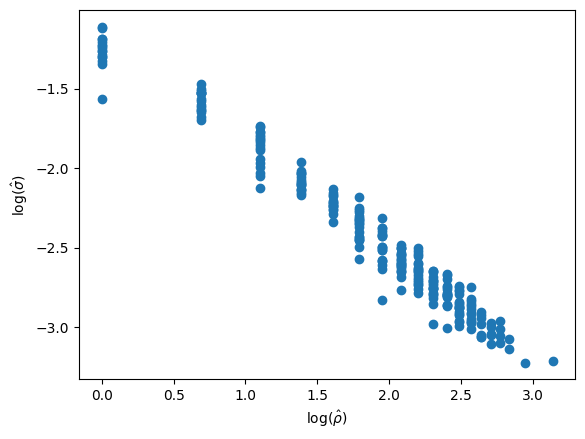

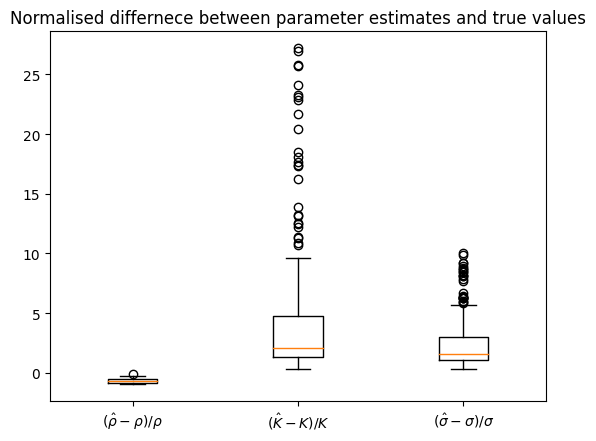

In [ ]:
plt.figure(1);
plt.scatter(np.log(params[:,0]), np.log(params[:,2]));
plt.xlabel(r"$\log(\hat{\rho})$"); plt.ylabel(r"$\log(\hat{\sigma})$");

data = [(params[:,0]- rho)/rho, (params[:,1]-K)/K, (params[:,2]- sigma)/sigma]
fig7, ax7 = plt.subplots()
ax7.set_title('Normalised differnece between parameter estimates and true values')
ax7.boxplot(data)
plt.xticks([1, 2, 3], [r'$(\hat{\rho} - \rho)/\rho$',
                      r'$(\hat{K} - K)/K$',
                      r'$(\hat{\sigma} - \sigma)/\sigma$'])
plt.show()

In [ ]:
print(f"""
        rho mean scaled bias: {np.mean((params[:,0]- rho)/rho)}
        K mean scaled bias: {np.mean((params[:,1]- K)/K)}
        sigma mean scaled bias: {np.mean((params[:,2]- sigma)/sigma)}

       """)


        rho mean scaled bias: -0.69152
        K mean scaled bias: 4.331259810845964
        sigma mean scaled bias: 2.4548077547136464

       


None
